# Lecture 1 <!-- markdownlint-capture --> Introduction
Reference: [QuantEcon](https://julia.quantecon.org/)

[Florian Oswald's notes](https://scpo-compecon.github.io/CoursePack/)

## Execute (part of the code) in Jupyter
`Shift + Enter` will evaluate a highlighted selection or line
The run symbol in the menu bar (or `Ctrl+Shift+Enter`) will run the whole file

In [1]:
println("hello world!")

hello world!


Jupyter automacally prints the result of the last line in a cell.

In [2]:
"hello world!"

"hello world!"

## Package Environments
Julia’s package manager lets you set up packages used in your current code by specifying the "dependencies" (i.e., required packages).

An environment is a set of packages specified by a `Project.toml` (and optionally, a `Manifest.toml`). Do not delete Project.toml or Manifest.toml in your working directory!

### Download packages
When: first time you use it or install update

Example: to download package "Plots.jl", first import the `Pkg` package to your code. Then use command `Pkg.add("Plots")` to download package `"Plots.jl"`.

In [3]:
import Pkg; Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [4]:
### Use packages in your own code
using Plots

## Inserting unicode (e.g. Greek letters)

Julia supports the use of [unicode characters](https://docs.julialang.org/en/v1/manual/unicode-input/) such as $\alpha$ and $\beta$ in your code

Unicode characters can be typed quickly using the `tab` key

Try creating a new code cell and typing `\alpha`, then hitting the `tab` key on your keyboard.

In [6]:
α = 0.01

0.01

## Data types
    # [Reference](https://docs.julialang.org/en/v1/manual/arrays/)
    # In Julia, arrays and tuples are the most important data type for working with numerical data.

### Array is mutable which means you can change its data value and modify its structure, a tuple is immutable.

### In this section we give more details on
* creating and manipulating Julia arrays
* fundamental array processing operations
* basic matrix algebra
* tuples and named tuples
* ranges
* nothing, missing, and unions

In [7]:
### One dimensional array is assumed to be a column vector. Use either semicolon or comma to connect elements.
a = [1; 2; 3]
b = [1.0, 2.0, 3.0]
# The output tells us that the arrays are of types `Vector{Int64}` and `Vector{Float64}` respectively. Here `Int64` and `Float64` are types for the elements inferred by the compiler.

3-element Vector{Float64}:
 1.0
 2.0
 3.0

In [9]:
# It is important to distinct between integers and floating point numbers because there are certain operations one type cannot perform.
# only use integers to index the location of an entry in an array.
a[1]

1

In [10]:
# This wil not work.
a[1.0]

LoadError: ArgumentError: invalid index: 1.0 of type Float64

In [11]:
 # Display the type of `a`
 typeof(a)

Vector{Int64} (alias for Array{Int64, 1})

In [12]:
### A row vector is a 2-dimensional (i.e., 1 * N matrix).
c = [1 2 3]
# The output is Array{Int64,2}. "2" means this is a 2-dim object.

1×3 Matrix{Int64}:
 1  2  3

In [13]:
### Check dimensions/sizes
size(a) # return a 1-dim turple (3,)

(3,)

In [14]:
size(a,1) # return a number, often more useful

3

In [15]:
ndims(a) # return the dimension of a

1

In [16]:
ndims(c) # return the dimension of c

2

### Array vs Vector vs Matrix
* Vector{Float64} = Array{Float64,1}
* Matrix{Int64} = Array{Int64, 2}
* I mentions this because people use terms interchangibly, so don't get confused when reading the documentations.

In [17]:
Array{Int64, 1} == Vector{Int64}

true

In [18]:
Array{Int64, 2} == Matrix{Int64}

true

In [19]:
Array{Int64, 3} == Matrix{Int64}

false

### Creating Arrays

In [20]:
# Functions that Create Arrays
x = zeros(3)


3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [21]:
x = zeros(3,3)

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [22]:
x = ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [23]:
x = ones(3,3)

3×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [24]:
x = fill(1.0,3,3,3) # To return an array filled with a single value, use `fill`

3×3×3 Array{Float64, 3}:
[:, :, 1] =
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

[:, :, 2] =
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

[:, :, 3] =
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [25]:
y = similar(x) # create an array of the same size as x filled with zeros

3×3×3 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [26]:
 # You can create an empty array using the `Array()` constructor
 x = Array{Float64}(undef, 3) # undef means undefined numbers

3-element Vector{Float64}:
 6.93656954769055e-310
 6.9365695163506e-310
 6.9365695385855e-310

In [27]:
    # The printed values you see here are just garbage values. So why doing this?
    # This could be useful if you want to define the default data type in an array. For example, you cannot do this
    x = Array{Float64}(3.0, 3)

LoadError: MethodError: no method matching (Array{Float64, N} where N)(::Float64, ::Int64)
[0mClosest candidates are:
[0m  (Array{T, N} where N)([91m::LinearAlgebra.UniformScaling[39m, ::Integer, [91m::Integer[39m) where T at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:475
[0m  (Array{T, N} where N)([91m::UndefInitializer[39m, ::Int64) where T at boot.jl:462
[0m  (Array{T, N} where N)([91m::UndefInitializer[39m, ::Int64, [91m::Int64[39m) where T at boot.jl:463
[0m  ...

### Creating Arrays from Existing Arrays

In [28]:
# Suppose you want to create a temporary variable `y = x`, this will only bind an additional name `y` to the value `x` points to.
y = x;
y[1] = 123;
x

3-element Vector{Float64}:
 123.0
   6.9365695163506e-310
   6.9365695385855e-310

In [29]:
# To create a new variable), you need to be more explicit
# use copy()
y = copy(x);
y[1] = 100;
x, y


([123.0, 6.9365695163506e-310, 6.9365695385855e-310], [100.0, 6.9365695163506e-310, 6.9365695385855e-310])

In [30]:
# use y[:] = x instead of y=x
y[:] = x;
y[1] = 1000;
x, y

([123.0, 6.9365695163506e-310, 6.9365695385855e-310], [1000.0, 6.9365695163506e-310, 6.9365695385855e-310])

In [31]:
# select elements that satisfy certain conditions.
index = x .== 123;
x[index]
index = argmax(x);
x[index]

123.0

In [33]:
### Arrays can be fairly flexible
# different types, bad for Julia's speed
x = ["foo" "bar" 1; "foo" "bar" 2]

2×3 Matrix{Any}:
 "foo"  "bar"  1
 "foo"  "bar"  2

In [34]:
# array of arrays
# suppose you have observations on [age gender wage] in 2 cities, you can stack observations in a city to a vector
data = [[50 1 1000.0; 60 2 6000.0],[25 1 2500.1]]
# do not need to create an additional variable "city"
# very powerful for parallelization

2-element Vector{Matrix{Float64}}:
 [50.0 1.0 1000.0; 60.0 2.0 6000.0]
 [25.0 1.0 2500.1]

In [38]:
### tuples
x = ("foo", "bar", 1)

("foo", "bar", 1)

In [37]:
x[3]

1

In [39]:
# Tuples are inmutable, so you cannot change the value of a tuple.
# Very useful to store values that are not changeable.
x[3] = 2

LoadError: MethodError: no method matching setindex!(::Tuple{String, String, Int64}, ::Int64, ::Int64)

In [40]:
## ranges, fancier indexing
x = collect(1:1:100)
y = collect(range(1, length = 100, stop = 100))
@show x[2:50]
x[75:end]

x[2:50] = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


26-element Vector{Int64}:
  75
  76
  77
  78
  79
  80
  81
  82
  83
  84
  85
  86
  87
  88
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [41]:
# Alternative syntax
1:2:40 |> collect

20-element Vector{Int64}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19
 21
 23
 25
 27
 29
 31
 33
 35
 37
 39

In [42]:
# loop over an array
languages = ["julia", "python", "stata"]
for l in languages
    println(l)
end

julia
python
stata


In [44]:
# iterator
for i = 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [45]:
# while loop
val = 1.0
tol = 0.002
while val > tol
    global val
    val = val / 2
end
val

0.001953125

In [46]:
# Conditionals
x = 1
x == 1

true

In [47]:
x == 2

false

In [48]:
x == 1 && x == 2

false

In [49]:
x == 1 || x == 2

true

true

In [51]:
if x == 2
    println("true")
elseif x!=2
    println("false")
end

false


## Making functions

In [52]:
function foo(x; a = 2)
    y = x^2 * a
    x, y
end

foo (generic function with 1 method)

In [53]:
x, y = foo(2)
x, y = foo(2, a = 3)

(2, 12)

In [55]:
f(x) = x^2
f(4)

16

#### Lambda Functions

Anonymous (or lambda) functions can be created using the `->` syntax. 

In [59]:
g = x -> x ^ 2

#6 (generic function with 1 method)

In [60]:
g(2)

4

This is useful for passing functions to higher-order functions, such as the `map` function.

In [62]:
# This function maps the square function to each element of the array A
squareall(A) = map(x -> x ^ 2, A)

squareall (generic function with 1 method)

In [63]:
squareall(1:10)

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [64]:
# broadcasting 
x = collect(1:1:10)
y = log.(x)

10-element Vector{Float64}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906
 1.6094379124341003
 1.791759469228055
 1.9459101490553132
 2.0794415416798357
 2.1972245773362196
 2.302585092994046

## Example 1: White Noise

In [65]:
using Plots, Distributions

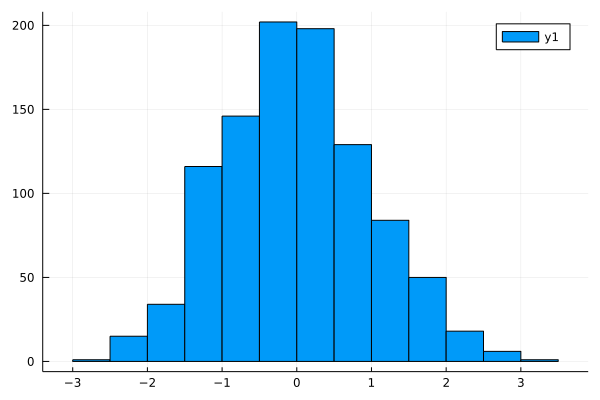

In [66]:
dist = Normal(0,1) # Define a standard Normal distribution
n = 1000 # Sample size
ϵ = rand(dist, n) # Simulate a sample of Normal distribution using rand function
plot(1:n, ϵ) # plot(x-axis, y-axis)
histogram(ϵ) # plot distribution of the simulated sample

## Example 2: OLS

In [67]:
β_0 = 1.0
β_1 = 2.0
β_2 = 3.0
n = 10000
x = rand(n).*10
x2 = x.^2
ϵ = rand(dist, n)
Y = β_0 .+ β_1.*x + β_2.*x2 .+ ϵ
X = hcat(ones(n), x, x2) # horizontal catenation
β_ols = inv(X' * X) * X' * Y

3-element Vector{Float64}:
 1.0065494031390607
 2.0007710483575343
 2.999886641624818